In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Replace 'employee_attrition.csv' with the path to your downloaded dataset
data = pd.read_csv('/content/Employee-Attrition.csv')
data.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
# Check for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [9]:
# Encode categorical variables
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['Over18'] = label_encoder.fit_transform(data['Over18'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

In [10]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

In [11]:
data.corr().Attrition.sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [12]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','EnvironmentSatisfaction','JobInvolvement','JobLevel','StockOptionLevel','YearsWithCurrManager'], inplace=True)

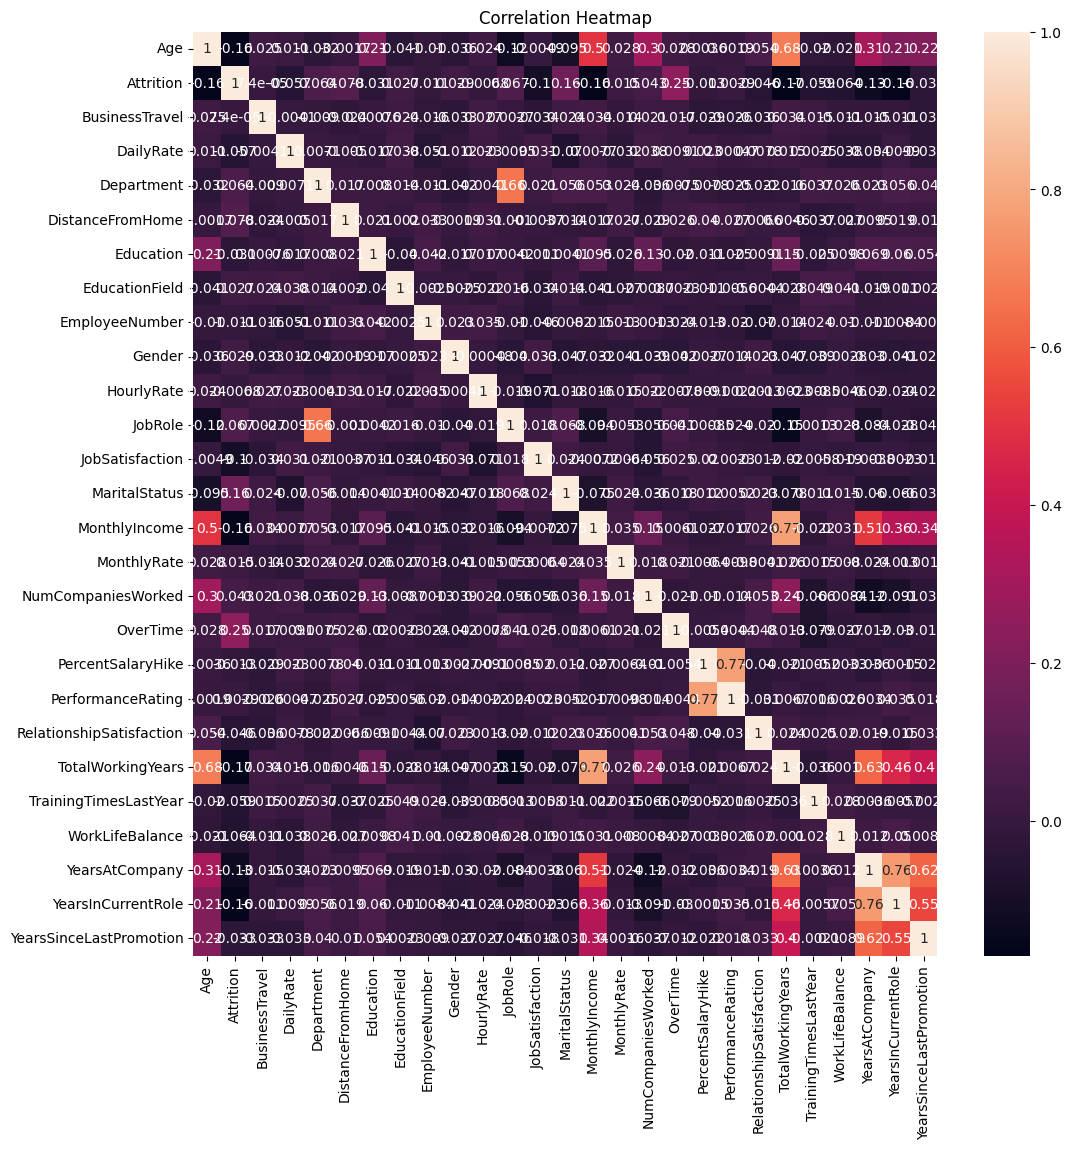

In [13]:
# Data Visualization
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-14-368e96cf2ea0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DistanceFromHome"])


<Axes: xlabel='DistanceFromHome', ylabel='Density'>

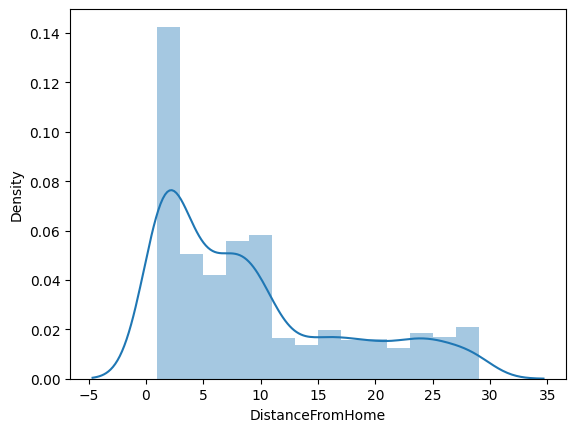

In [14]:
sns.distplot(data["DistanceFromHome"])

<Axes: >

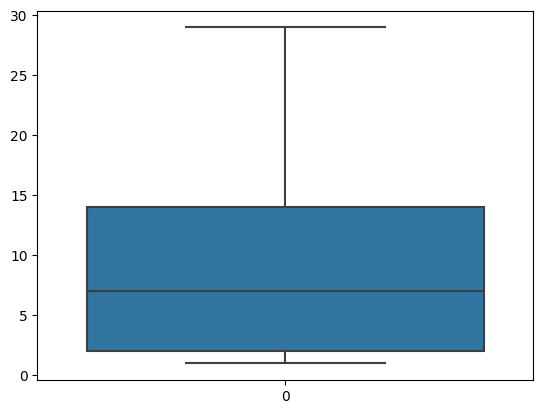

In [15]:

sns.boxplot(data.DistanceFromHome)

<Axes: >

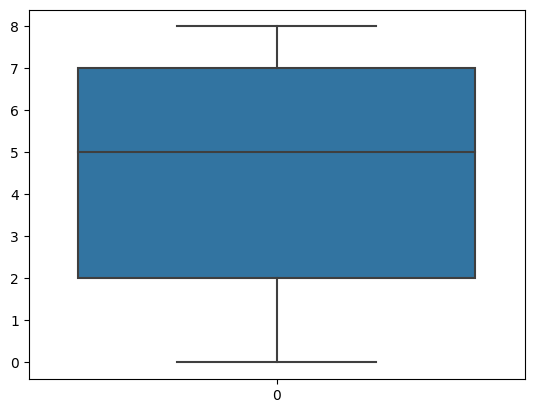

In [16]:

sns.boxplot(data.JobRole)

<Axes: >

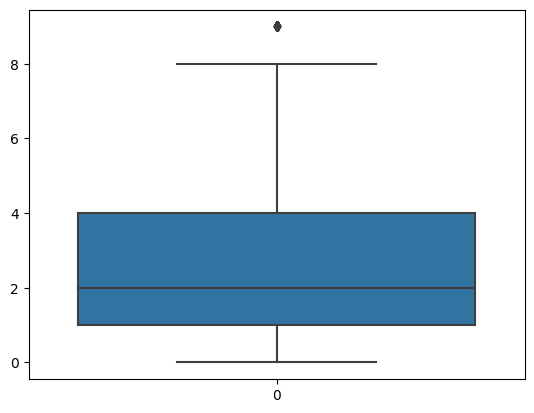

In [17]:
sns.boxplot(data.NumCompaniesWorked)

In [18]:
q1=data.NumCompaniesWorked.quantile(0.25)
q3=data.NumCompaniesWorked.quantile(0.75)

In [19]:
data.NumCompaniesWorked.median()

2.0

In [20]:
iqr=q3-q1
ul=q3+1.5*iqr

In [21]:
data['NumCompaniesWorked']=np.where(data['NumCompaniesWorked']>ul,2,data['NumCompaniesWorked'])

<Axes: >

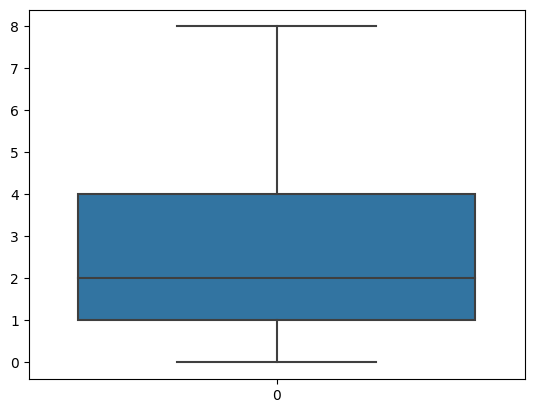

In [22]:
sns.boxplot(data.NumCompaniesWorked)

In [23]:
columns_to_keep=['OverTime','MaritalStatus','NumCompaniesWorked']
x = data.drop(columns=[col for col in data.columns if col not in columns_to_keep])
x.head()

MaritalStatus  NumCompaniesWorked  OverTime
0              2                   8         1
1              1                   1         0
2              2                   6         1
3              1                   1         1
4              1                   2         0

In [24]:
y=data['Attrition']

In [25]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Decision Tree

In [27]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
pred=dt.predict(X_test)

In [29]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64

In [31]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [32]:
accuracy_score(y_test,pred)

0.8435374149659864

In [33]:
confusion_matrix(y_test,pred)

array([[243,  12],
       [ 34,   5]])

In [34]:
pd.crosstab(y_test,pred)

col_0        0   1
Attrition         
0          243  12
1           34   5

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       255
           1       0.29      0.13      0.18        39

    accuracy                           0.84       294
   macro avg       0.59      0.54      0.55       294
weighted avg       0.80      0.84      0.82       294



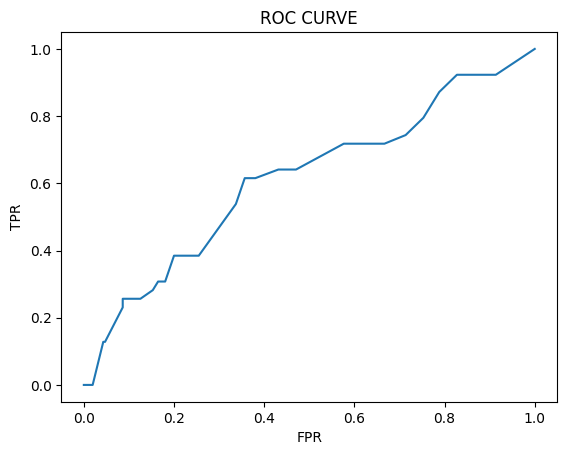

In [36]:
# roc_curve
probability=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.5459280303030303, 0.9444444444444444, 'x[2] <= 0.482\ngini = 0.28\nsamples = 1176\nvalue = [978, 198]'),
 Text(0.2878787878787879, 0.8333333333333334, 'x[0] <= 0.552\ngini = 0.182\nsamples = 837\nvalue = [752, 85]'),
 Text(0.1590909090909091, 0.7222222222222222, 'x[1] <= 0.939\ngini = 0.131\nsamples = 584\nvalue = [543, 41]'),
 Text(0.07575757575757576, 0.6111111111111112, 'x[0] <= -0.818\ngini = 0.114\nsamples = 476\nvalue = [447, 29]'),
 Text(0.045454545454545456, 0.5, 'x[1] <= -0.432\ngini = 0.041\nsamples = 142\nvalue = [139, 3]'),
 Text(0.030303030303030304, 0.3888888888888889, 'x[1] <= -0.889\ngini = 0.07\nsamples = 83\nvalue = [80, 3]'),
 Text(0.015151515151515152, 0.2777777777777778, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.045454545454545456, 0.2777777777777778, 'gini = 0.059\nsamples = 66\nvalue = [64, 2]'),
 Text(0.06060606060606061, 0.3888888888888889, 'gini = 0.0\nsamples = 59\nvalue = [59, 0]'),
 Text(0.10606060606060606, 0.5, 'x[1] <= -0.889\ngini 

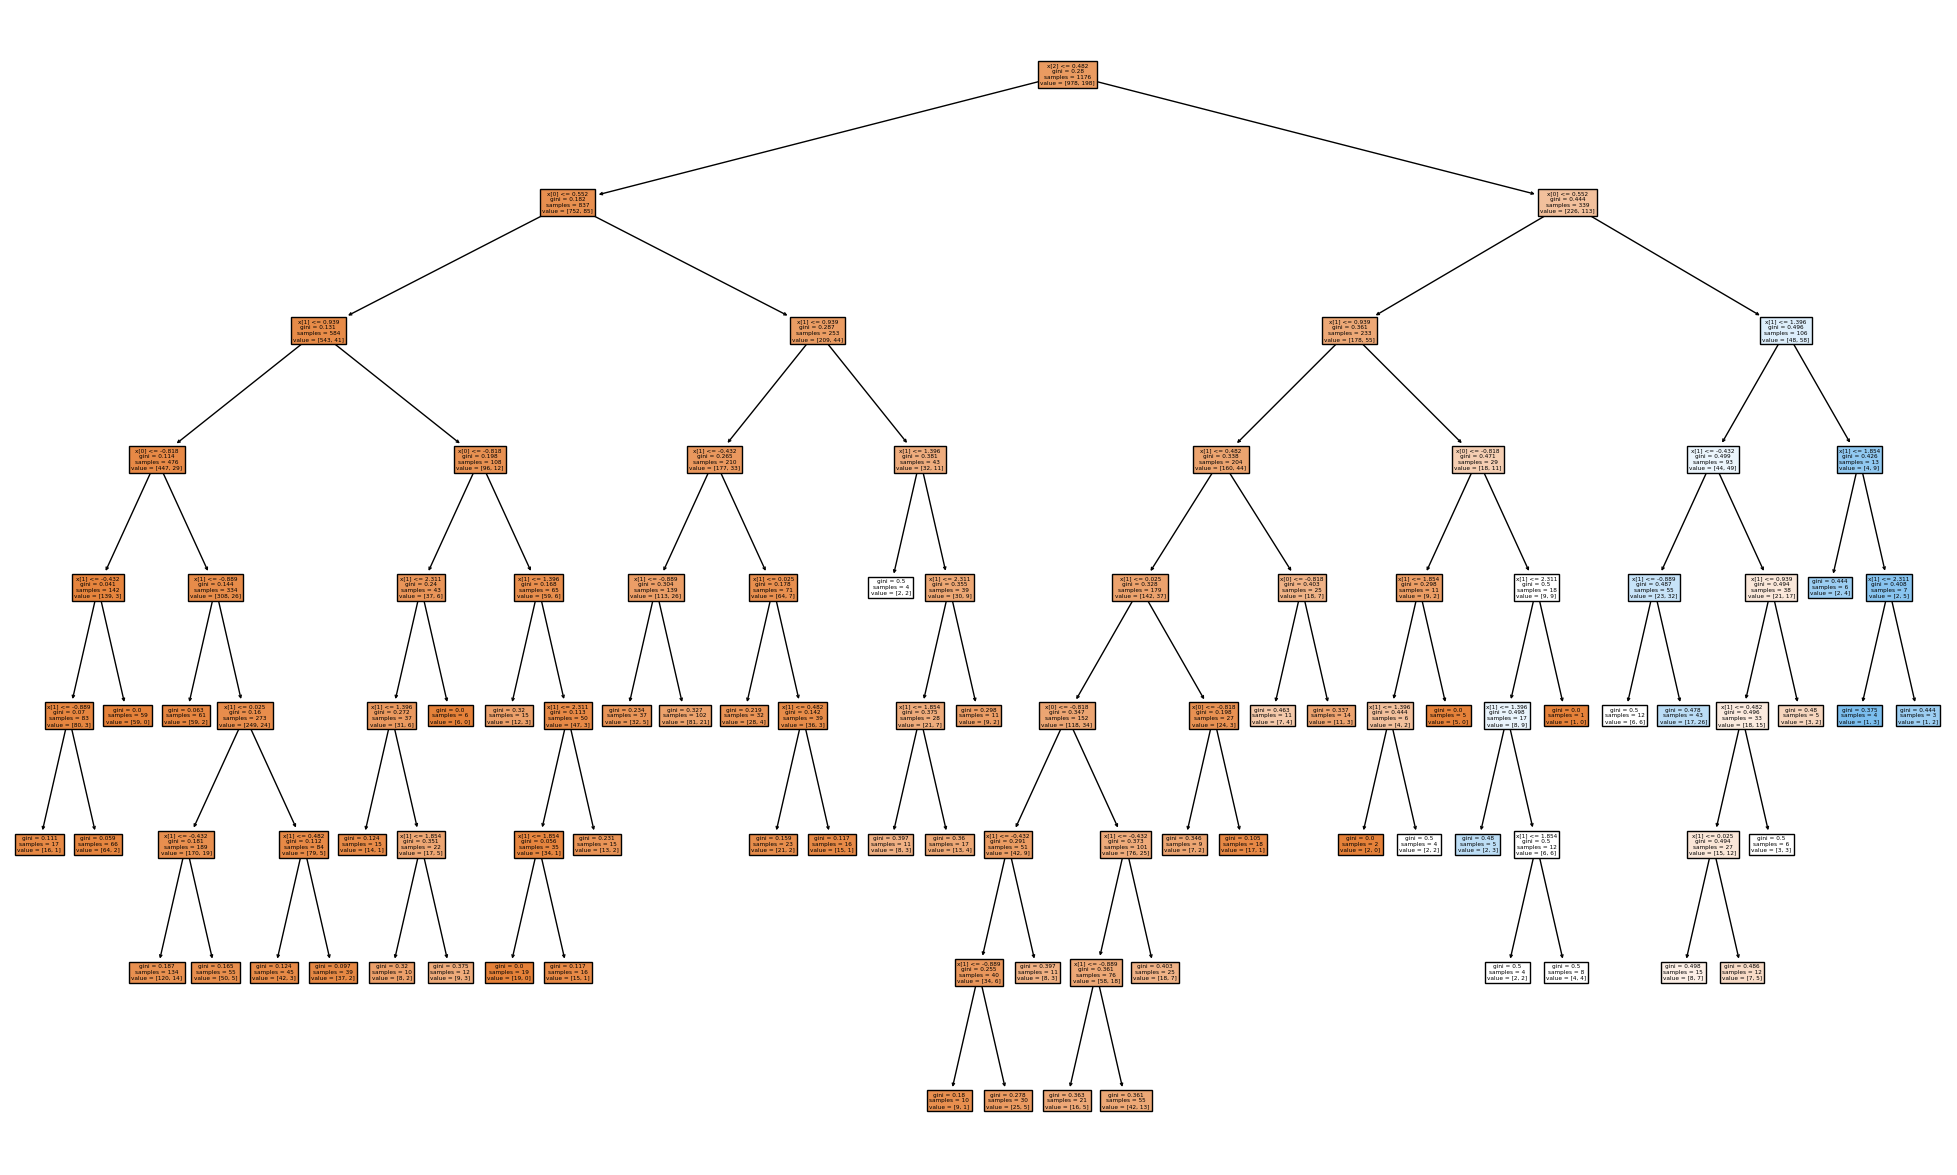

In [37]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dt,filled=True)

In [38]:
from sklearn.model_selection import GridSearchCV
para={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [39]:
grid_search=GridSearchCV(estimator=dt,param_grid=para,cv=5,scoring="accuracy")

In [40]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [42]:
dt_cv=DecisionTreeClassifier(criterion= 'gini',
 max_depth=4,
 max_features='auto',
 splitter='random')
dt_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=4, max_features='auto', splitter='random')

In [43]:
pred=dt_cv.predict(X_test)

In [44]:
accuracy_score(y_test,pred)

0.8469387755102041

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.12      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.50      0.50      0.48       294
weighted avg       0.77      0.85      0.80       294

